In [91]:
import pandas as pd

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv("../data/players_data.csv")

In [93]:
df.drop(columns=['NAME', 'COUNTRY', 'TEAM', 'ID', 'INTERNATIONAL_REPUTATION', 'PREFERRED_FOOT', 'REAL_FACE'], inplace=True)

df['KIT_NUMBER'] = pd.to_numeric(df['KIT_NUMBER'], errors='coerce')
df = df.dropna(subset=['KIT_NUMBER'])

def clean_and_convert(column):
    return pd.to_numeric(column.str.replace(r'[^0-9.]', '', regex=True).replace('', pd.NA), errors='coerce').astype('float64')

df['VALUE'] = clean_and_convert(df['VALUE'])
df['WAGE'] = clean_and_convert(df['WAGE'])
df['RELEASE_CLAUSE'] = clean_and_convert(df['RELEASE_CLAUSE'])

df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], format='%d/%m/%Y')

current_year = datetime.now().year

df['AGE'] = current_year - df['BIRTH_DATE'].dt.year

df.drop(columns=['BIRTH_DATE'], inplace=True)

In [94]:
def map_positions(position):
    if position == 'GK':
        return 'GOALKEEPER'
    elif position in ['CB', 'RB', 'LB', 'RWB', 'LWB']:
        return 'DEFENDER'
    elif position in ['CM', 'CDM', 'CAM', 'RM', 'LM']:
        return 'MIDFIELDER'
    elif position in ['ST', 'CF', 'RF', 'LF', 'RW', 'LW']:
        return 'FORWARD'
    else:
        return 'OTHER'

df['BROAD_POSITION'] = df['POSITION'].apply(map_positions)
df.drop(columns=['POSITION'], inplace=True)
df.to_csv('../data/players_preprocessed_and_grouped_positions.csv', index=False)

In [95]:
x = df.drop(columns='BROAD_POSITION')
y = df['BROAD_POSITION']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

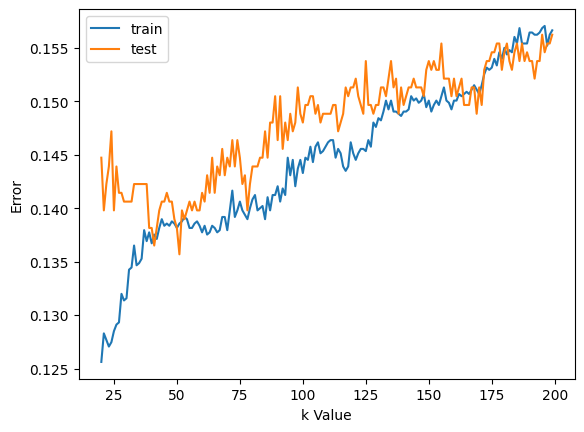

In [96]:
train_error = []
test_error = []

for k in range(20, 200):
    knn= KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    y_pred_train = knn.predict(x_train)
    train_error.append(np.mean(y_train != y_pred_train))
    
    y_pred_test = knn.predict(x_test)
    test_error.append(np.mean(y_test != y_pred_test))
    
plt.plot(range(20, 200), train_error, label="train")
plt.plot(range(20, 200), test_error, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [97]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [98]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8618421052631579